In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import plotly
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [0]:
data = pd.read_csv("/content/drive/My Drive/Kaggle Datasets /WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [0]:
data.drop(index=[488,753,936,1082,1340,3331,3826,4380,5218,6670,6754], inplace = True)

In [0]:
data['MonthlyCharges'] = data['MonthlyCharges'].astype('float32')
data['TotalCharges'] = data['TotalCharges'].astype('float32')

In [6]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float32
TotalCharges        float32
Churn                object
dtype: object

In [7]:
data.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [0]:
data.drop(columns = ['customerID'], inplace = True)

In [9]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
data['tenure'].nunique()

72

In [0]:
data['Churn'].replace({'No':'0', 'Yes':'1'}, inplace = True)

In [0]:
data['Churn'] = data['Churn'].astype('int32')

In [13]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,1


In [0]:
train = data.loc[:5632]
test = data.loc[5633:]

In [15]:
train['total/tenure'] = train['TotalCharges']/train['tenure']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
train.drop(columns = ['tenure','TotalCharges', 'total/tenure'], inplace = True)
test.drop(columns = ['tenure','TotalCharges'], inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Exploratory Data Analysis (EDA)

In [17]:
train['Churn'].value_counts()

0    4136
1    1488
Name: Churn, dtype: int64

In [18]:
train.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,0
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,0
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,1
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,0
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,1


Text(0, 0.5, 'Charge')

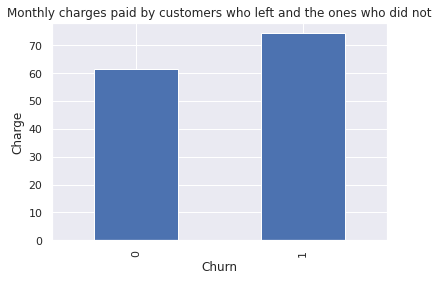

In [19]:
train.groupby(['Churn'])['MonthlyCharges'].mean().plot(kind = 'bar', title = 'Monthly charges paid by customers who left and the ones who did not')
plt.ylabel('Charge')

In [20]:
senior_citizen = train.loc[train['SeniorCitizen'] == 1]
print("% Population of senior citizen : {:.2f} %".format(senior_citizen['SeniorCitizen'].count()/train['SeniorCitizen'].count() * 100))

% Population of senior citizen : 16.07 %


In [21]:
train.groupby(['Churn'])['SeniorCitizen'].value_counts()

Churn  SeniorCitizen
0      0                3606
       1                 530
1      0                1114
       1                 374
Name: SeniorCitizen, dtype: int64

In [22]:
total_churn = train.loc[train['Churn'] == 1]
senior_citizen_churn = train.loc[(train['Churn'] == 1) & (train['SeniorCitizen'] == 1)]
print("Senior Citizens as a percentage of total customers lost : {:.2f} %".format(senior_citizen_churn['Churn'].count()/total_churn['Churn'].count()*100))

Senior Citizens as a percentage of total customers lost : 25.13 %


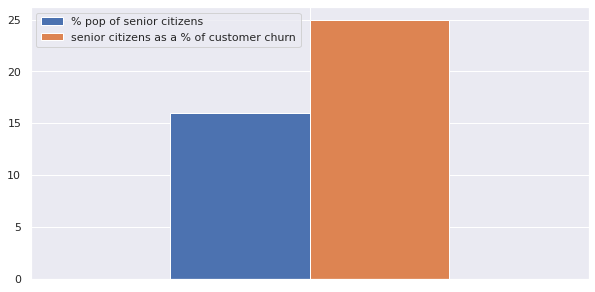

In [23]:
pd.DataFrame({"% pop of senior citizens":15.94,
              "senior citizens as a % of customer churn": 24.96}, 
             index = ['']).plot(kind = 'bar', figsize = (10,5))

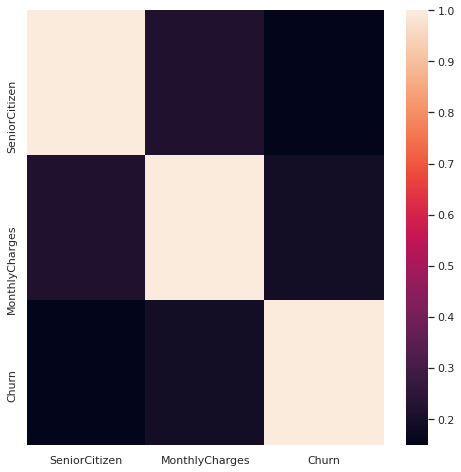

In [24]:
plt.figure(figsize = (8,8))
sns.heatmap(train.corr(method = 'pearson'))

## Data Preprocessing and Preparation

In [25]:
test.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
5633,Male,0,No,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,26.350000,0
5634,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.900000,1
5635,Female,0,Yes,No,Yes,No,DSL,No,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,54.700001,0
5636,Male,0,Yes,No,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,46.349998,1
5637,Male,0,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,One year,No,Credit card (automatic),90.250000,0


In [0]:
train_cont_cols = train.loc[:,['MonthlyCharges']]
test_cont_cols = test.loc[:,['MonthlyCharges']]

In [0]:
train_y = train['Churn']
test_y = test['Churn']

In [28]:
test_y.tail(1)

7042    0
Name: Churn, dtype: int32

In [29]:
train.drop(columns=['MonthlyCharges', 'Churn'], inplace=True)
test.drop(columns=['MonthlyCharges', 'Churn'], inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
train_dummies = pd.get_dummies(train)
test_dummies = pd.get_dummies(test)

In [31]:
test_dummies.head(1)

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5633,0,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1


In [32]:
test_y.head(1)

5633    0
Name: Churn, dtype: int32

In [0]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [0]:
train_cont_cols = ss.fit_transform(train_cont_cols)
test_cont_cols = ss.fit_transform(test_cont_cols)

In [35]:
test_cont_cols.shape

(1408, 1)

In [0]:
train_cont_data = pd.DataFrame(data=train_cont_cols, columns = ['MonthlyCharges'])
test_cont_data = pd.DataFrame(data=test_cont_cols, index = range(5632,7040,1), columns = ['MonthlyCharges'])

In [0]:
train = pd.concat(objs = [train_dummies, train_cont_data, train_y], axis = 1)
test = pd.concat(objs = [test_dummies, test_cont_data, test_y], axis = 1)

In [0]:
train.dropna(inplace  = True)
test.dropna(inplace = True)

In [0]:
train_y_final = train['Churn']
test_y_final = test['Churn']

In [0]:
train.drop(columns = ['Churn'], inplace=True)
test.drop(columns = ['Churn'], inplace=True)

In [41]:
train.shape

(5615, 43)

In [42]:
test.shape

(1405, 43)

## Model Building and Evaluation

In [0]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_curve, precision_recall_curve

### Support Vector Classifier

In [0]:
SVC = svm.SVC(C = 0.7, kernel  = 'linear')
model_SVC = SVC.fit(train,train_y_final)
SVC_pred = model_SVC.predict(test)

In [45]:
print("Accuracy Score (SVC) : {:.2f}".format(accuracy_score(test_y_final, SVC_pred)))

Accuracy Score (SVC) : 0.79


In [46]:
print("f1 score : {:.2f}".format(f1_score(test_y_final, SVC_pred)))

f1 score : 0.59


In [47]:
print(classification_report(test_y_final,SVC_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.87      0.86      1025
         1.0       0.62      0.56      0.59       380

    accuracy                           0.79      1405
   macro avg       0.73      0.71      0.72      1405
weighted avg       0.78      0.79      0.78      1405



### Logistic Regression

In [0]:
lr = LogisticRegression()
model_lr = lr.fit(train,train_y_final)
lr_pred = model_lr.predict(test)

In [50]:
print("Accuracy Score (LR) : {:.2f}".format(accuracy_score(test_y_final, lr_pred)))

Accuracy Score (LR) : 0.79


In [51]:
print("f1 score : {:.2f}".format(f1_score(test_y_final, lr_pred)))

f1 score : 0.58


In [52]:
print(classification_report(test_y_final,lr_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86      1025
         1.0       0.63      0.53      0.58       380

    accuracy                           0.79      1405
   macro avg       0.73      0.71      0.72      1405
weighted avg       0.78      0.79      0.78      1405



### Random Forest Classifier

In [0]:
rfc = RandomForestClassifier(n_estimators = 200, max_depth = 5, max_features = 20, random_state = 100)
model_rfc = rfc.fit(train,train_y_final)
rfc_pred = model_rfc.predict(test)

In [55]:
print("Accuracy Score (RFC) : {:.2f}".format(accuracy_score(test_y_final, rfc_pred)))

Accuracy Score (RFC) : 0.79


In [56]:
print("f1 score : {:.2f}".format(f1_score(test_y_final, rfc_pred)))

f1 score : 0.56


In [57]:
print(classification_report(test_y_final, rfc_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      1025
         1.0       0.65      0.49      0.56       380

    accuracy                           0.79      1405
   macro avg       0.74      0.70      0.71      1405
weighted avg       0.78      0.79      0.78      1405



### Gradient Boosting Classifier

In [0]:
gbdt = GradientBoostingClassifier(n_estimators = 200, max_depth = 5, random_state = 100)
model_gbdt = gbdt.fit(train, train_y_final)
gbdt_pred = model_gbdt.predict(test)

In [60]:
print("Accuracy Score (GBDT) : {:.2f}".format(accuracy_score(test_y_final, gbdt_pred)))

Accuracy Score (GBDT) : 0.77


In [61]:
print("f1 score : {:.2f}".format(f1_score(test_y_final, gbdt_pred)))

f1 score : 0.52


In [62]:
print(classification_report(test_y_final,gbdt_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85      1025
         1.0       0.61      0.46      0.52       380

    accuracy                           0.77      1405
   macro avg       0.71      0.68      0.69      1405
weighted avg       0.76      0.77      0.76      1405

